In [54]:
#import necessary packages
import pypylon.pylon as py
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [55]:
camera = py.InstantCamera(py.TlFactory.GetInstance().CreateFirstDevice())   
camera.Open()
camera.PixelFormat.SetValue("BayerRG8")
camera.ExposureAuto.SetValue("Continuous")
#camera.ExposureAuto.SetValue("Off")

#camera.ExposureTimeAbs.SetValue = 150
camera.GainAuto.SetValue("Continuous")

camera.StartGrabbing(1)
grab = camera.RetrieveResult(2000, py.TimeoutHandling_ThrowException)
if grab.GrabSucceeded():
    img = grab.Array
 
camera.Close()

In [56]:


#global_threshold
_,thresh1 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY) #threshold value is set to 150 and '_' is throwaway var, which ignores the return value
_,thresh2 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV) #binary_inverse

#adaptive_threshold

thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
thresh4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

images = [img,thresh1,thresh2,thresh3,thresh4 ]
titles = ["Greyscale","Binary","Binary Inverse","Adaptive Mean","Adaptive Gaussian"]



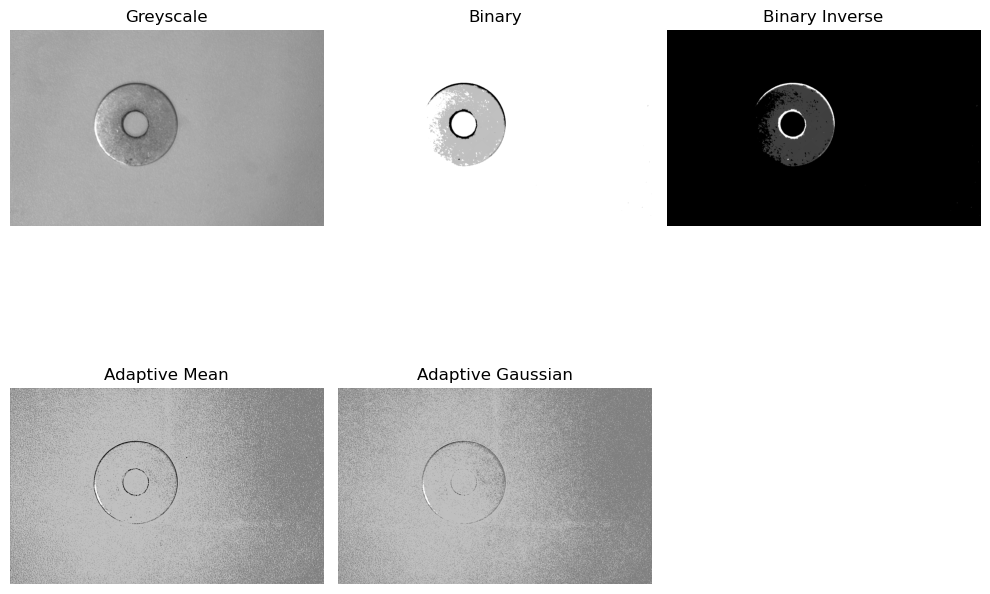

In [57]:
plt.figure(figsize=(10,8))
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i],cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
